In [8]:
import pandas as pd

df = pd.read_csv("participants.csv")

columns_to_keep = [
    "age", "gender", "occupation", "linguistics",
    "general_impression", "positive_feedback", "improvement_suggestions"
]

filtered_df = df.dropna(subset=["general_impression", "positive_feedback", "improvement_suggestions"], how='all')

filtered_df = filtered_df[columns_to_keep]

filtered_df.to_csv("filtered_participants.csv", index=False)

print("Filtered CSV file saved as 'filtered_participants.csv'.")


Filtered CSV file saved as 'filtered_participants.csv'.


In [9]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re

# Ensure nltk stopwords are available
nltk.download("stopwords")

# Load the CSV file
file_path = "filtered_participants.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Select relevant text columns
text_columns = ["general_impression"]
text_data = df[text_columns].fillna("").astype(str).apply(lambda x: " ".join(x), axis=1)

# Combine all text responses into a single string
all_text = " ".join(text_data).lower()

# Clean the text (remove special characters, punctuation, etc.)
all_text = re.sub(r'[^a-zA-ZæøåÆØÅ\s]', '', all_text)

# Load Norwegian stopwords and add common non-insightful words
norwegian_stopwords = set(stopwords.words("norwegian"))
custom_stopwords = norwegian_stopwords.union({
    "å", "og", "det", "er", "som", "i", "på", "til", "av", "for", "med", 
    "en", "et", "den", "de", "har", "ikke", "om", "jeg", "du", "han", "hun", 
    "vi", "dere", "så", "at", "kan", "man", "men", "fra", "eller", "var", "hadde", "veldig", "forstå", "litt",
    "høre", "hørte", "hørtes", "dialekt", "lengre", "mer", "flere","mer", "klipp", "dialektene", "ord", "andre",
    "dialekter", "mye", "skjønne", "sagt", "korte", "lenger", "helt", "klippet", "sier", "gjorde", "oversikt", "klippen", "lyd",
    "snakker", "forbedres", "stemmene", "lett", "igjen", "kanskje", "vet", "satt", "fleste", "tolke", "opplevde",
    "ai", "ganger", "virker", "snakk", "tal", "stedvis", "grad", "kategorier", "justere", "oppfatte", 
    "flyt", "oppfatte","personen", "kvalitet", "tale", "få", "følte", "større", "plukke", "essensen", "sekunder", "sammenligne",
    "klippene", "ulike",  "slutten", "jeh", "skilte", "nyanser", "hverandre", "føltes", "random", "enkelte",
    "gjette", "beskrive", "variasjoner", "mønstre", "språk", "tyde", "lydklippene", "nokså", "virket", "lytte", "lydkvalitet",
    "fremsto", "tid", "forskjellig", "toneleie", "tid", "høres", "sett", "sammen", "ungikk", "setningen", 
    "talemåter", "trykke", "fløt", "ux", "konsentrasjon", "frem", "diksjon", "sløse", "talene", "pilot", "skyldes", "radioen",
    "fremsto", "forskjellige", "tillegg", "språket", "engang", "inntrykk", "representert", "lurt", "måte",
    "ofte", "enten", "forskjell", "scorte", "dialektelementer", "manglet", "alltid", "starten", "framstilling",
    "føles", "stemme", "menneske", "funnet", "klang", "spille", "lydklipp", "krevde", "ene", "ellers",
    "tonefall", "følge", "trakk", "ca", "bidro", "generert", "meste", "hente", "elte", "stort", "trakk", "unngikk",
    "språkmodeller", "hører", "far", "første", "stemmer", "spilt", "fremsto", "vandt", "innholdet", "vel", 
    "undertone", "sa", "kjente", "stor", "fresmto", "tegn"
})

# Remove stopwords from text
filtered_words = [word for word in all_text.split() if word not in custom_stopwords]

# Generate new word cloud with filtered words
filtered_text = " ".join(filtered_words)

# Count word frequencies again after filtering
word_counts_filtered = Counter(filtered_words)

# Get the 10 most common words after filtering
common_words_filtered = word_counts_filtered.most_common(10)

# Extract words and counts for plotting
words_filtered, counts_filtered = zip(*common_words_filtered)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/victorialangoe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


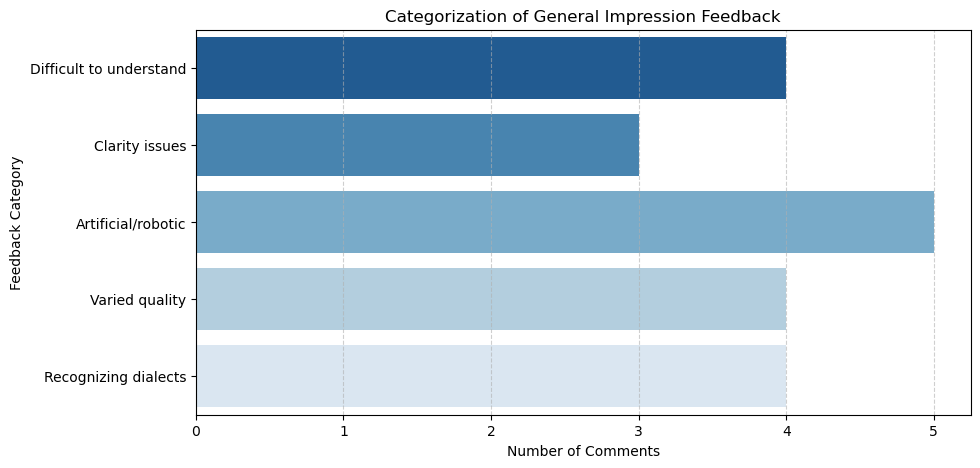

In [11]:
import seaborn as sns
from collections import Counter

# Raw qualitative feedback
feedback_list = [
    "Umulig å skjønne hva som ble sagt!",
    "De var litt uklare",
    "Vanskelige å forstå",
    "Skjønner ikke helt om alle er kunstige eller ikke.",
    "Veldig dårlige og noen veldig gode.",
    "Problemer med å høre hva de sier på enkelte klipp. Snakker for fort. Ellers greit",
    "At setningen ofte er vanskeligst å forstå enten på starten eller slutten av klippet",
    "Noen var veldig mye tydeligere enn andre, noen virket ikke som ord engang og noen virket som de var satt random sammen.",
    "Mitt generelle inntrykk av lydklippene var at de stort sett var enkle å høre og forstå, men jeg opplevde at det krevde mye konsentrasjon for å virkelig tolke innholdet. Dette skyldes i stor grad variasjoner i lydkvalitet og tydelighet i talene.",
    "De fleste var vanskelige å tyde",
    "Variert, noen veldig gode - men de fleste var tydelig kunstige. 'Mekanisk' undertone",
    "Bra, men generelt litt vanskelig å hente ut essensen i hva som ble sagt",
    "Utydelig",
    "Dårlig",
    "Noen skurrer og det gjorde at jeg følte de var mer unaturlig og som roboter. Vanskelig å gjette dialektene på så korte sekunder",
    "Mange ord fløt inn i hverandre, manglet tydelig diksjon",
    "Mange av klippene var vanskelige å skjønne",
    "Ikke noe spesielt. Noen av enklere å forstå enn andre.",
    "Stor spredning i kvalitet",
    "Vanskelig å høre hva de sa. Tonefall hørtes bra ut på noen, men veldig feil på andre",
    "At de syntetiske hadde en metallisk klang",
    "Jeg er dårlig på dialekter, så dette ble litt vanskelig. Ok til middels klipp",
    "Noen er bra men de meste høres ut som en pilot som snakker over radioen",
    "Veldig vanskelig å forstå hva de sier. Føles som de fleste var av samme dialekt.",
    "Ville blitt lurt av dette.",
    "Helt ok! Var på en måte alltid ett av klippene som var mye bedre enn den andre.",
    "Noen var veldig bra og noen dårlig",
    "God",
    "Varierende kvalitet",
    "At det var en som var spilt inn av et menneske og et som var si generert",
    "Noen var forståelige med forskjellig tonefall som gjorde at det hørtes ut som de hadde en dialekt."
]

# Manually categorizing the feedback into themes
categories = {
    "Difficult to understand": ["umulig å skjønne", "vanskelig å forstå", "de fleste var vanskelige å tyde", "mange av klippene var vanskelige å skjønne", "umulig å skjønne hva som ble sagt"],
    "Artificial/robotic": ["syntetiske", "robot", "metallisk klang", "kunstig", "mekanisk", "pilot som snakker over radioen"],
    "Clarity issues": ["uklare", "skurrer", "diksjon", "flyt", "fløt inn i hverandre"],
    "Varied quality": ["varierende kvalitet", "stor spredning i kvalitet", "noen veldig gode", "noen veldig dårlige"],
    "Recognizing dialects": ["dialekt", "vanskelig å gjette dialektene", "føles som de fleste var av samme dialekt"]
}

# Count occurrences per category
category_counts = Counter()

for feedback in feedback_list:
    for category, keywords in categories.items():
        if any(keyword in feedback.lower() for keyword in keywords):
            category_counts[category] += 1

# Convert to DataFrame for visualization
df = pd.DataFrame(category_counts.items(), columns=["Category", "Count"])

# Plot results
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="Count", y="Category", palette="Blues_r")
plt.xlabel("Number of Comments")
plt.ylabel("Feedback Category")
plt.title("Categorization of General Impression Feedback")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.savefig("feedback_categories_general_impression.pdf")
plt.show()


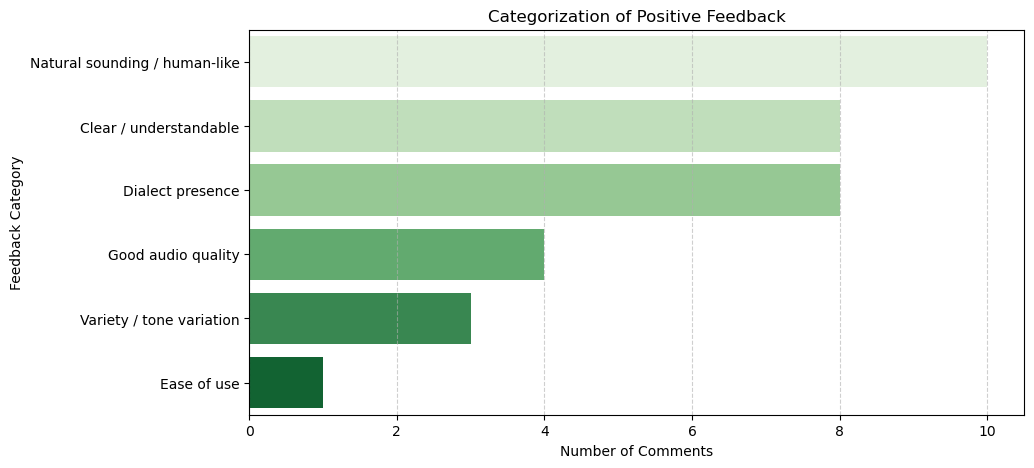

In [12]:
# Positive feedback list
positive_feedback_list = [
    "De unngikk å sløse tid ved å være korte.",
    "Vet ikke det skal vel være å sammenligne klippen med hverandre. Kanskje de alle var AI!",
    "Stemmene hørtes ekte ut",
    "De føltes alle nokså naturlige, noen skilte seg veldig ut og var veldig tydelige og føltes veldig ekte ut.",
    "At du kan høre dialekt",
    "At man kunne lytte flere ganger",
    "Flere lydklipp scorte bra i alle kategorier",
    "De var ulike og hadde nyanser i toneleie.",
    "Det som var bra med lydklippene, var at mange av dem hadde tydelig og forståelig tale, noe som gjorde det enklere å følge med. I tillegg var dialektene i flere av klippene godt representert og autentiske, noe som bidro til en realistisk framstilling.",
    "De fleste hørtes veldig naturlig og menneskelige ut",
    "Flere trakk inn gode dialektelementer, fresmto autentisk!",
    "tydelig lyd!",
    "Vet ikke",
    "Hørtes elte ut",
    "Ulike talemåter og virker kjente",
    "Stedvis naturlig flyt i språket",
    "Noen hadde bra stemme og lyd, med et klart språk",
    "Kult å få frem dialekt. Er ikke vandt å høre det språkmodeller.",
    "De sier noe som noen ville funnet på å si",
    "Noen hørtes helt autentiske ut",
    "Intuitivt UX. Enkelt å trykke for å spille av.",
    "To av dem var veldig tydelige.",
    "det var lett å høre et det far forskjellige dialekter",
    "Av noen var greie å forstå og hørtes naturlig ut.",
    "Hører ut som ekte stemmer, noen av disse.",
    "Fint med dialekt!",
    "Autensiteten i stemmene på de første 10 ca på A",
    "Ene klippet var tydelig",
    "Noen av dem var tydelig og lett å forstå",
    "Vet ikke",
    "At det var klare tegn av forskjell i dialekt på noen av de."
]

# Categorization of positive feedback
positive_categories = {
    "Natural sounding / human-like": ["ekte", "naturlig", "menneskelig", "autentisk", "flyt"],
    "Clear / understandable": ["tydelig", "forståelig", "klart språk", "lett å forstå", "greie å forstå"],
    "Dialect presence": ["dialekt", "talemåter", "forskjell i dialekt"],
    "Variety / tone variation": ["ulike", "nyanser", "toneleie", "forskjellige"],
    "Good audio quality": ["lyd", "bra stemme", "tydelig lyd", "scorte bra"],
    "Ease of use": ["UX", "trykke", "spille av"],
}

# Count per category
positive_counts = Counter()

for feedback in positive_feedback_list:
    for category, keywords in positive_categories.items():
        if any(keyword in feedback.lower() for keyword in keywords):
            positive_counts[category] += 1

# Convert to DataFrame
positive_df = pd.DataFrame(positive_counts.items(), columns=["Category", "Count"])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=positive_df, x="Count", y="Category", palette="Greens")
plt.xlabel("Number of Comments")
plt.ylabel("Feedback Category")
plt.title("Categorization of Positive Feedback")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.savefig("feedback_categories_positive_feedback.pdf")
plt.show()


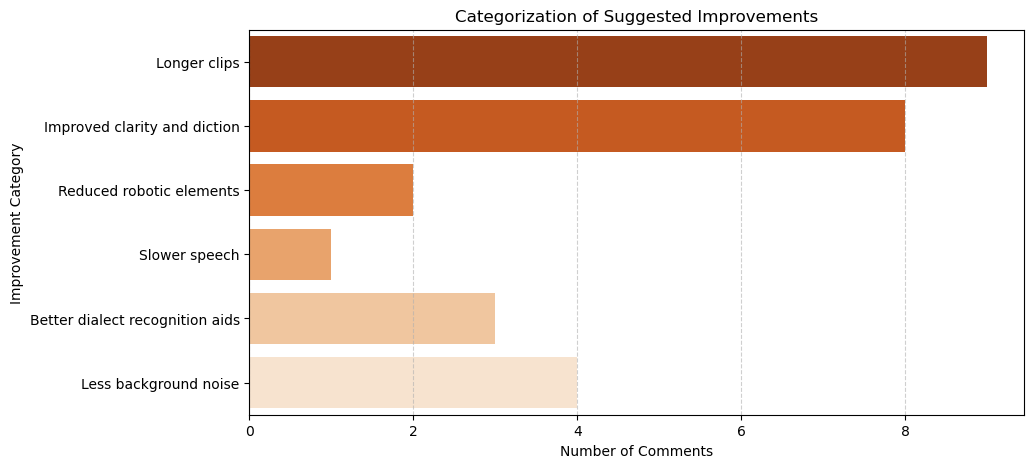

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# List of qualitative feedback on suggested improvements
suggested_improvements = [
    "Ville hadde lenger opptak så man i større grad kunne plukke opp mønstre i talen.",
    "Litt lenger tal så man oppfatter litt mere - de var litt for korte!",
    "Forståelighet",
    "Noen var litt creepy robotstemme, og noen var det umulig å tyde noen ord.",
    "De kunne vært lengre for å få bedre kunnskap om hvor personen kom fra.",
    "Snakk saktere",
    "Lengre for å få mer inntrykk",
    "Hørte ingen kvinner tror jeg. Kunne vært tydeligere hvilke dialekter som det kunne være, en oversikt, da jeg tror jeg kjente igjen flere dialekter, men glemmer navn på dem.",
    "Noen av lydklippene kan forbedres ved å justere stemmekvaliteten, da enkelte hadde skjærende lyder som kunne virke distraherende og ubehagelige å høre på. I tillegg opplevde jeg at enkelte klipp var vanskelige å forstå på grunn av mumling.",
    "Tydelighet på hva som blir sagt",
    "Vanskelig å beskrive - men 'mumlingen' og det noe statiske støyet? ref. 'mekanisk'",
    "lengde?",
    "Litt lengre",
    "Noen var uforståelige og dårlig uttale",
    "Lenger klipp for å gjøre det lettere å skjønne hva de snakker om og gjette dialekt",
    "Diksjon, det ble veldig mye ord som hørtes ut som mumling",
    "Klarere uttalelse og mindre støy i stemmen",
    "Mer forståelig",
    "Lengre klipp",
    "Rytme i språk, tydelighet og tonefall",
    "Mindre bakgrunnsstøy? Og mer variasjon i dialekter? Men ellers veldig bra!",
    "Tydelighet. Naturlighet og autensitet er ikke så nøye, jeg slet mest med forståelsen av hva de sa.",
    "skurre-lyden",
    "Snakke mer tydelig og mer naturlig.",
    "Noen av dem var for utydelige til å gjøre opp ei meining.",
    "Kanskje transcript eller noe etter? Lengre lydklipp?",
    "Det gikk for sakte og hakkete på de fleste på B",
    "Usikker",
    "Noen av dem snakket litt for fort og snøvlete. Også var det en del forstyrrende sus i bakgrunnen",
    "Vanskelig å høre",
    "Lengre setninger"
]

# Categorization of suggested improvements
improvement_categories = {
    "Longer clips": ["lengre", "lenger", "opptak", "setninger"],
    "Improved clarity and diction": ["forståelig", "uttale", "diksjon", "tydelighet"],
    "Reduced robotic elements": ["robot", "mekanisk", "creepy"],
    "Slower speech": ["snakk saktere", "snakket for fort"],
    "Less background noise": ["støy", "skurre", "bakgrunnsstøy"],
    "Better dialect recognition aids": ["dialekt", "oversikt", "kjente igjen"],
}

# Count per category
improvement_counts = Counter()

for feedback in suggested_improvements:
    for category, keywords in improvement_categories.items():
        if any(keyword in feedback.lower() for keyword in keywords):
            improvement_counts[category] += 1

# Convert to DataFrame
improvement_df = pd.DataFrame(improvement_counts.items(), columns=["Category", "Count"])

# Plot the suggested improvements
plt.figure(figsize=(10, 5))
sns.barplot(data=improvement_df, x="Count", y="Category", palette="Oranges_r")
plt.xlabel("Number of Comments")
plt.ylabel("Improvement Category")
plt.title("Categorization of Suggested Improvements")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.savefig("feedback_categories_suggested_improvements.pdf")
plt.show()
